# SToP clinic data Analysis

In [1]:
import csv

In [15]:
#Read the data
data = []

#Read all 5 community files.
for a in range (1, 6):
    temp_data = []
    with open(r'C:\Users\EPan\Documents\STOP\Community Data\Community{}.csv'.format(a)) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            temp_data.append(row)
    data.append(temp_data)

In [3]:
Category_dictionary = {}

#Create the Categories
Category_dictionary["Cuts and Wounds"] = ["dressing", "laceration", "cut", "wound", "bite"]
Category_dictionary["Boil and Abscess"] = ["boil", "abscess"]
Category_dictionary["Rash"] = ["rash"]
Category_dictionary["Impetigo"] = ["sores", "impetigo", "pyoderma", "school sores", "purulent", "crusted"]
Category_dictionary["Fungal Infections"] = ["fungal", "tinea", "ring worm", "scaly skin"]
Category_dictionary["Headlice"] = ["lice", "nit", "head lice", "scalp infestation"]
Category_dictionary["Eczema"] = ["dermatitis", "eczema", "atopic dermatitis", "infected eczema"]
Category_dictionary["Warts"] = ["wart", "molluscum"]
Category_dictionary["Scabies"] = ["scabies", "scabetic", "secondaily infected scabies", "impetiginous scabies"]
Category_dictionary["Skin"] = ["skin"] # Not required in the tables and plots

#Reverse the keys with individual components of the dictionary
group_dict = {}

for key in Category_dictionary:
    for a in range (0, len(Category_dictionary[key])):
        group_dict[Category_dictionary[key][a]] = key

In [66]:
#Remove duplicates from the same category

In [75]:
data[0][7]

['dressing', '18458', '2017-12-05', '      wound dressing    ', '12/26/1965']

In [74]:
data[0][466]

['wound', '18458', '2017-12-05', '      wound dressing    ', '12/26/1965']

In [16]:
delete_array = []
for a in range (0, len(data[0])):
    group_1 = group_dict[data[0][a][0]]
    temp_id_1 = data[0][a][1]
    temp_date_1 = data[0][a][2]
    
    for b in range (a + 1, len(data[0])):
        group_2 = group_dict[data[0][b][0]]
        temp_id_2 = data[0][b][1]
        temp_date_2 = data[0][b][2]
        
        if group_1 == group_2 and temp_id_1 == temp_id_2 and temp_date_1 == temp_date_2:
            delete_array.append(b)
delete_array.sort()

#delete any duplicate deletes 
a = 1
while a < len(delete_array):
    if delete_array[-a] == delete_array[-a-1]:
        del delete_array[-a]
    a = a + 1
    
delete_array.sort(reverse=True)
for a in range (0, len(delete_array)):
    del data[0][delete_array[a]]

In [62]:
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Print to CSV
f = open('SToP_tables.csv', 'w', newline='')
# create the csv writer
writer = csv.writer(f, delimiter=',')

#PrinT Results to CSV and save to an array for plotting
Plot_array = []
for community_number in range (0, len(data)):
    
    temp_plotarray = []
    Group_Total = {}
    for key in Category_dictionary:
        Group_Total[key] = [0]*75
    Group_Total["Total"] = [0]*75 #An entry for the total number of skin related primary presentations.

    for a in range (0, len(data[community_number])):
        group = group_dict[data[community_number][a][0]]
        date = data[community_number][a][2]
        year = int(date.split("-")[0])
        month = int(date.split("-")[1]) - 1
        column = (year - 2017) * 12 + month

        #Add to the total of group_total
        if  column < 75:
            Group_Total[group][column] = Group_Total[group][column] + 1
            #if column == 0:
                #print(group, date, column)
                
    #Find total
    for key in Group_Total:
        if key != "Skin" and key != "Total":
            for a in range (0, len(Group_Total[key])):
                Group_Total["Total"][a] = Group_Total["Total"][a] + Group_Total[key][a]
                
    #Header
    Headings = ["Community {}".format(community_number + 1)]
    for a in range (0, 75):
        #print(a, 2017 + int(a / 12), Months[a % 12])
        temp_string = "{}-{}".format(2017 + int(a / 12), Months[a % 12])
        Headings.append(temp_string)
    writer.writerow(Headings)

    temp = []
    for key in Group_Total:
        if key != "Skin":
            Group_Total[key].insert(0, key)
            writer.writerow(Group_Total[key])
            #print(community_number, key)
            temp_plotarray.append(Group_Total[key])
            temp.append(Group_Total[key])
    Plot_array.append(temp)

f.close()

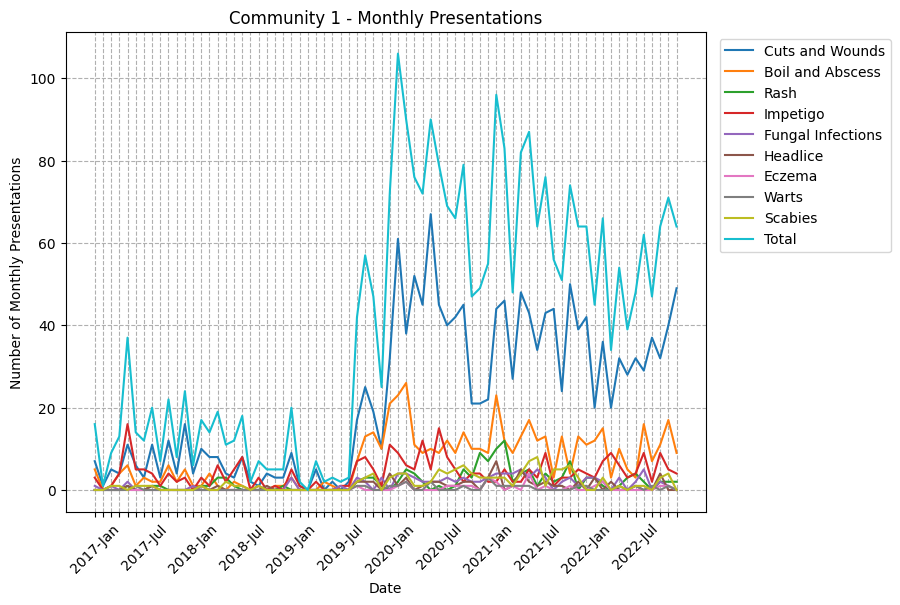

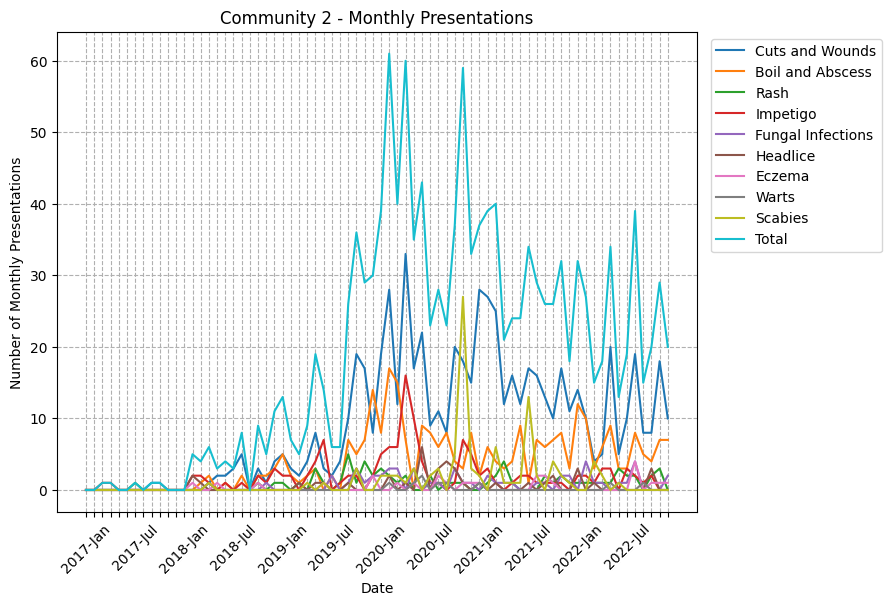

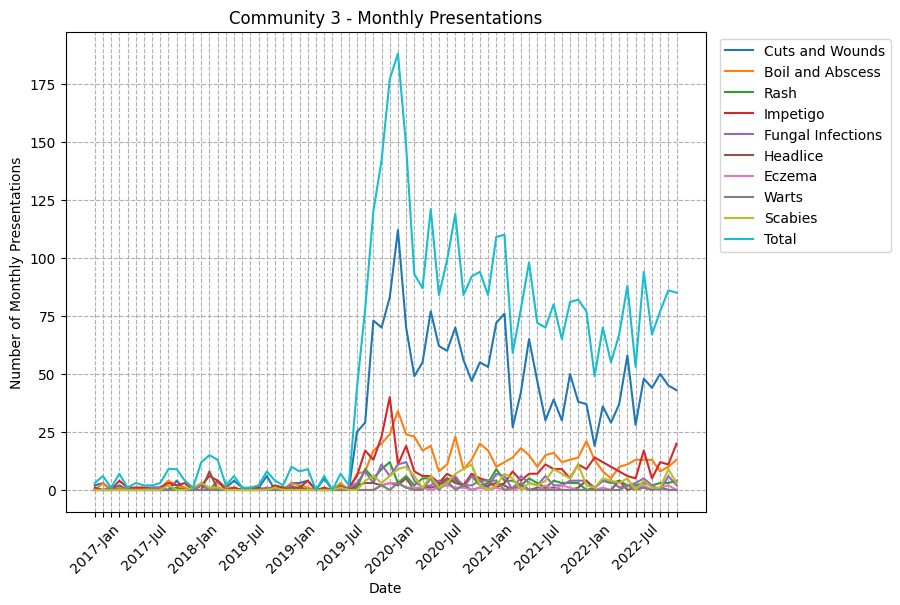

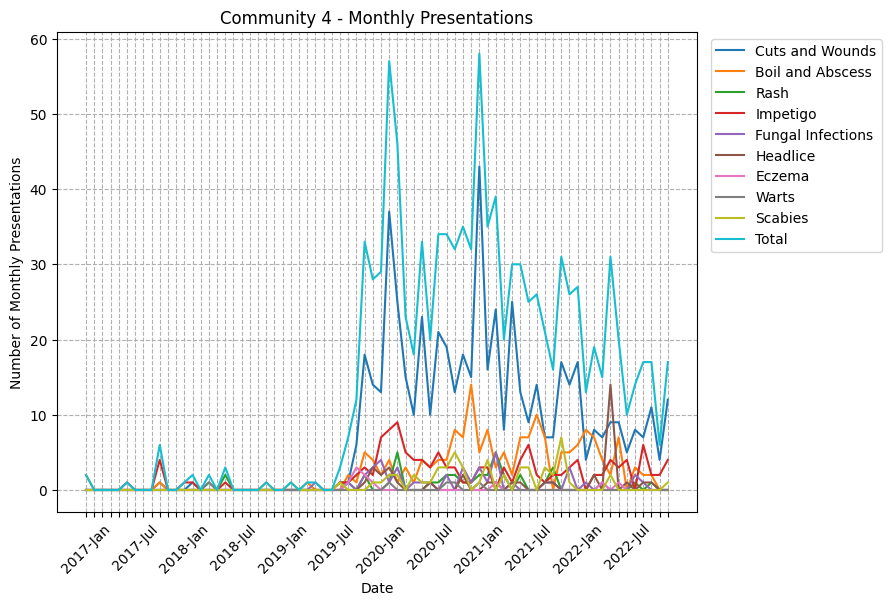

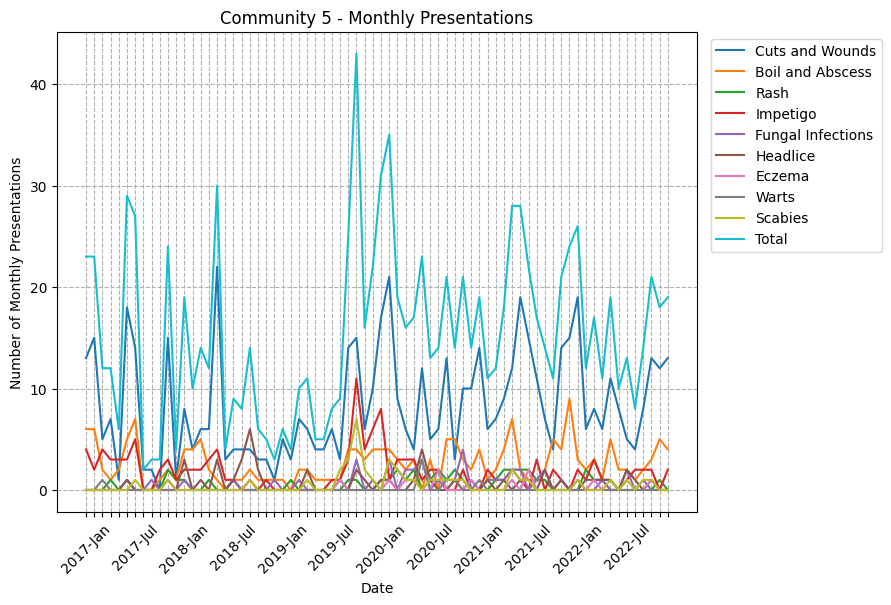

In [82]:
#PLOT BY COMMUNITY
for a in range (0, len(Plot_array)):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for b in range (0, len(Plot_array[a])):
        ax.plot(Headings[1:-3], Plot_array[a][b][1:-3], label=Plot_array[a][b][0])

    #Show every 6 months
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::6]))
    for label in temp:
        label.set_visible(False)

    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.grid(True, linestyle="dashed")
    plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")
    
    plt.title("Community {} - Monthly Presentations".format(a + 1))
    plt.ylabel("Number of Monthly Presentations")
    plt.xlabel("Date")
    plt.savefig('Community {}.png'.format(a + 1),dpi=300, bbox_inches = "tight")
    
    plt.show()
    
    

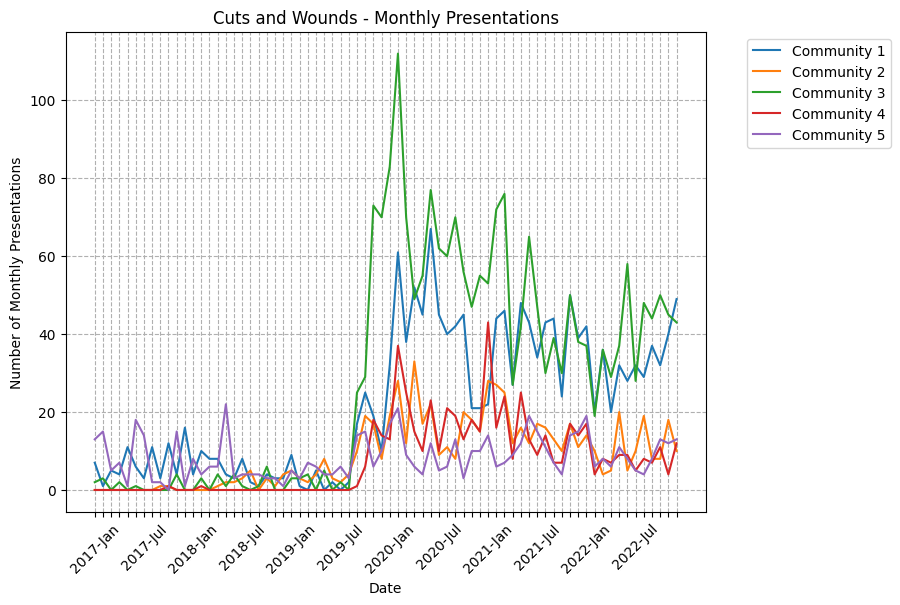

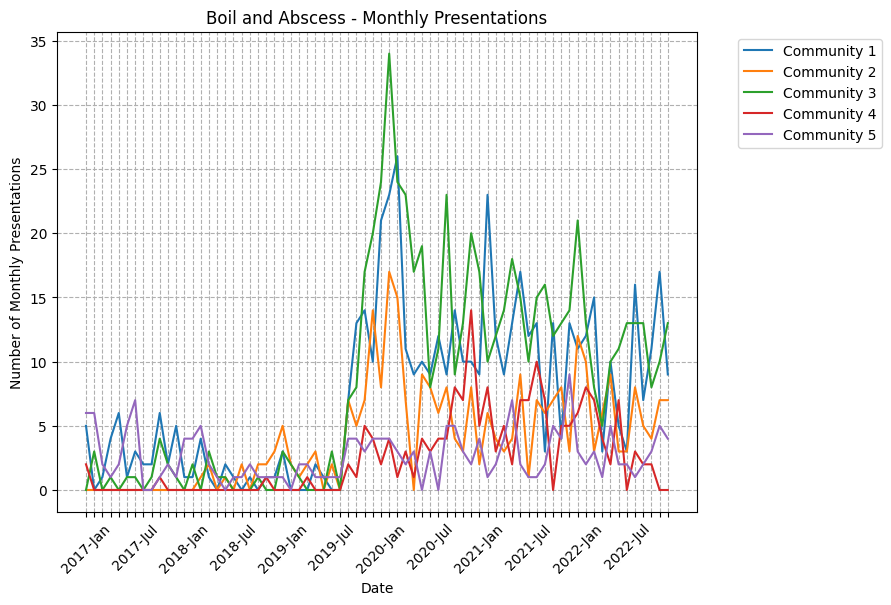

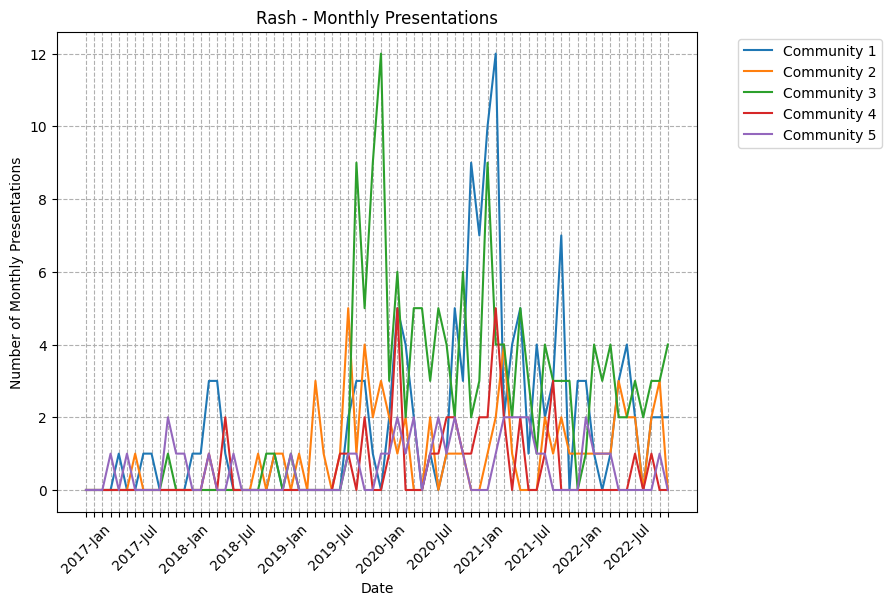

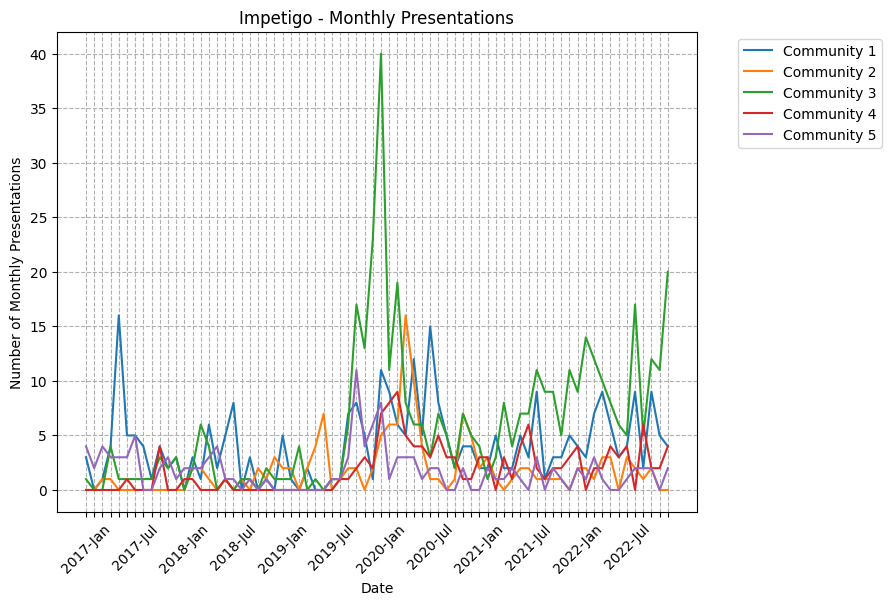

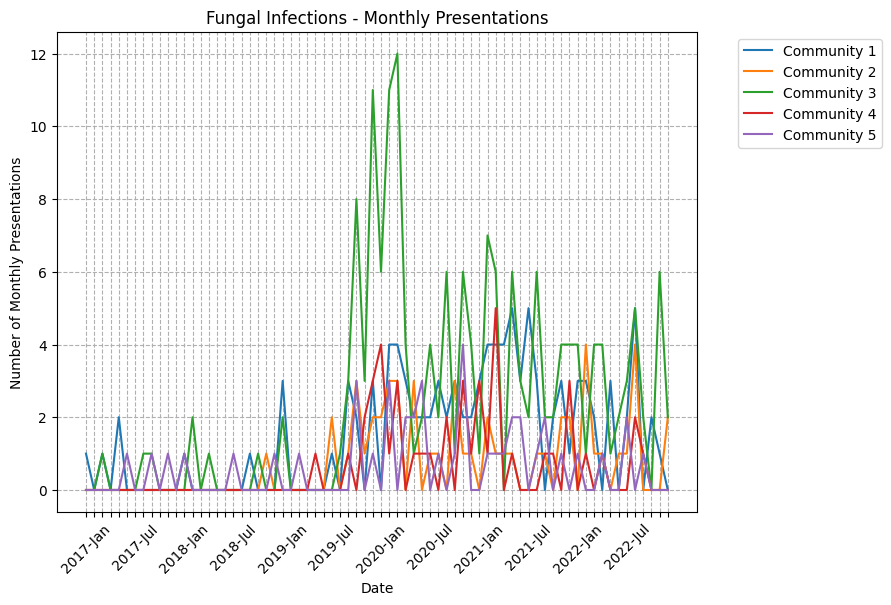

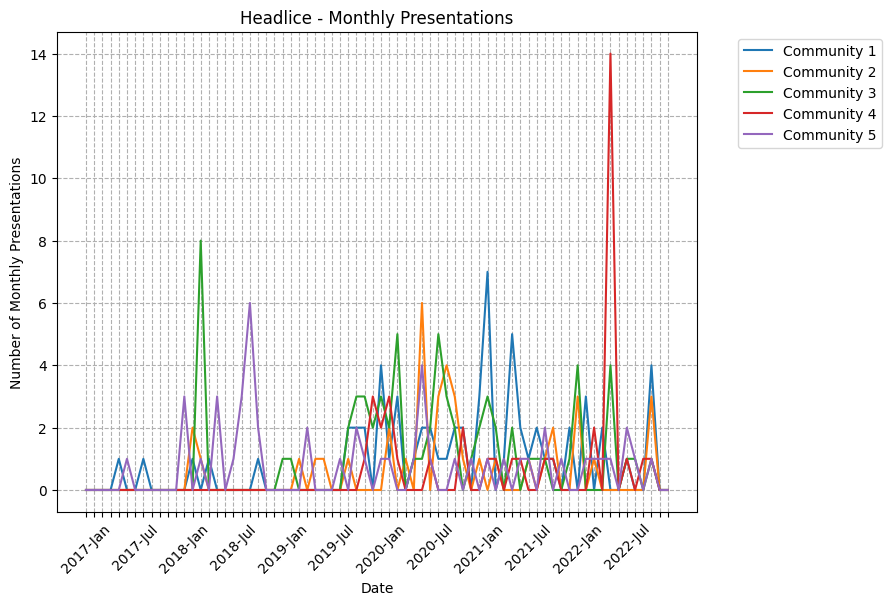

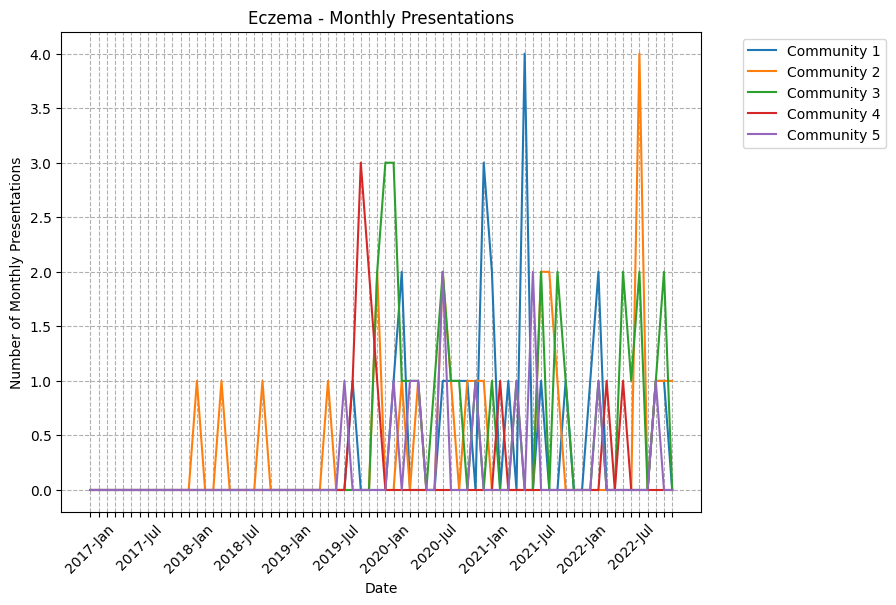

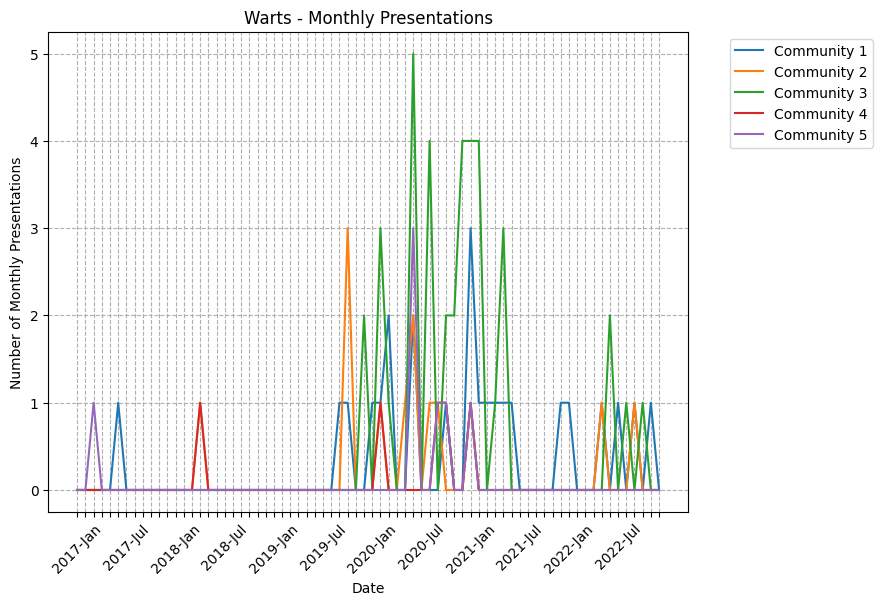

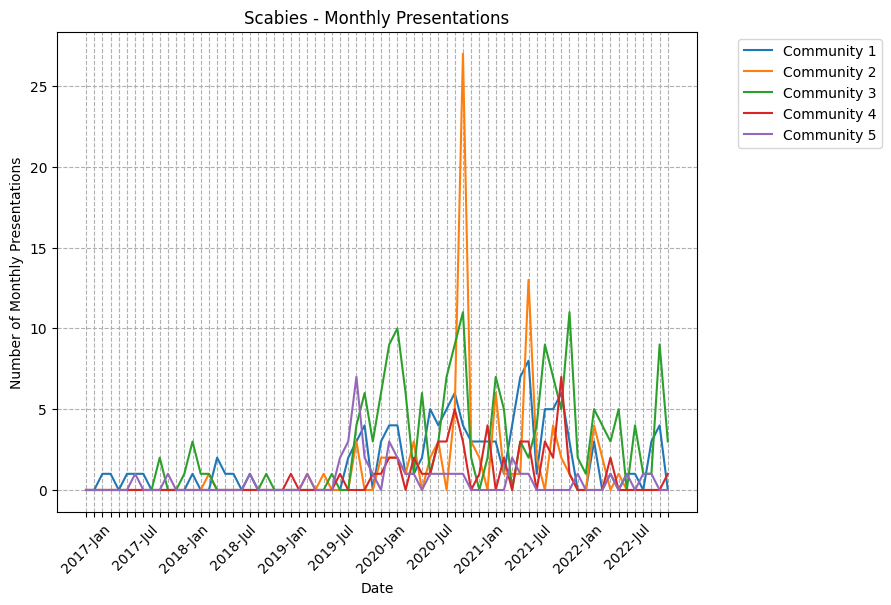

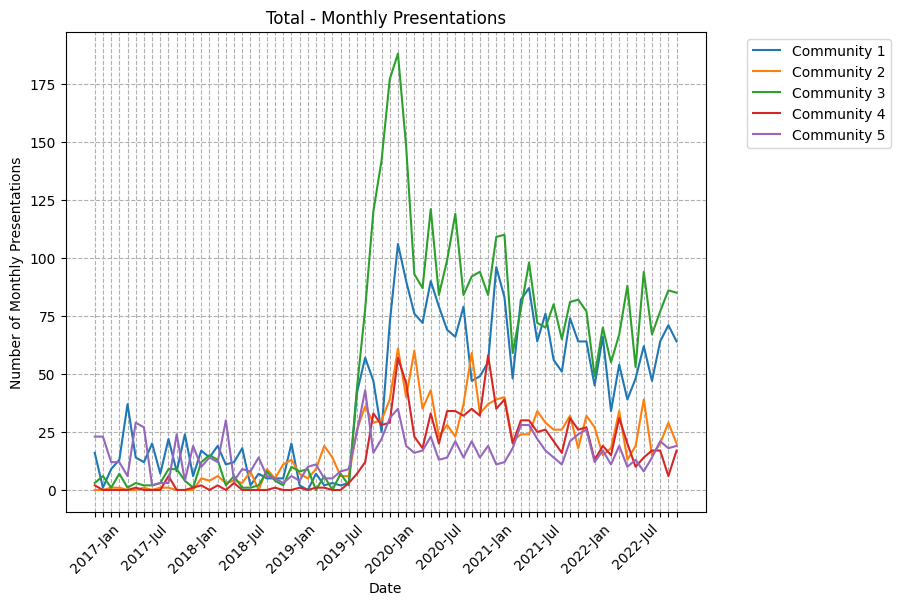

In [83]:
#PLOT BY COMMUNITY
for b in range (0, len(Plot_array[0])):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for a in range (0, len(Plot_array)):
        ax.plot(Headings[1:-3], Plot_array[a][b][1:-3], label= "Community {}".format(a + 1))

    #Show every 6 months
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::6]))
    for label in temp:
        label.set_visible(False)

    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.grid(True, linestyle="dashed")
    plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")
    
    plt.title("{} - Monthly Presentations".format(Plot_array[a][b][0]))
    plt.ylabel("Number of Monthly Presentations")
    plt.xlabel("Date")
    plt.savefig('{}.png'.format(Plot_array[a][b][0]),dpi=300, bbox_inches = "tight")
    plt.show()